In [104]:
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [57]:
df_raw = pd.read_excel('based_on_text.xlsx')

In [59]:
df_raw.head(1)

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、I have read the Information Sheet and I am willing to participate in the survey.,2、Gender,3、What is your level of education?,4、What type of English classes do you teach?,...,12、Both teachers and students have knowledge about online software services available.,12、Both teachers and students have experience about the usage of online software.,"13、In terms of technology, how do you feel about the effectiveness of factors for teaching English online?—The online software is simple and flexible to use.",13、The online software provides students with fast access to information.,13、Both the teachers and students have knowledge about the usage of online software .,13、The online software could offer good organization of course content and activities.,13、The online software could offer upload and download attachments without delays. ( e.g.: the slide and the audio file),14、What factor do you think is the most effective for teaching English online during Covid-19? (e.g. How to design the class that could enable the students to concentrate on it ),15、What factor do you think is the least effective for teaching English online during Covid-19?(e.g. Almost all students and teachers have computers or mobile phones and have access to Internet.),总分
0,1,2022/6/23 23:35:24,430秒,微信,NaN,92.40.179.54(国外-英国),Yes,Female,Master,Primary school or below primary education┋Othe...,...,Slightly ineffective,Slightly ineffective,Ineffective,Ineffective,Ineffective,Ineffective,Slightly effective,(空),(空),124


In [60]:
def group_by_percentage(df, col_name, asc = False):
    series_count = df.groupby([col_name]).size().sort_values(ascending=asc)
    df_count = series_count.to_frame(name = 'count_cnt').reset_index()
    df_count['percentage'] = round((df_count['count_cnt'] / df_count['count_cnt'].sum()) * 100, 2)
    return df_count

# 1. Pre-check of data set

In [61]:
# 1.Confirm every one has read the information sheet
group_by_percentage(df_raw, '1、I have read the Information Sheet and I am willing to participate in the survey.')

,1、I have read the Information Sheet and I am willing to participate in the survey.,count_cnt,percentage
0,Yes,62,100.0


In [62]:
# 2. Drop the respondent that do not have any experience in teaching English online
df_raw = df_raw.loc[df_raw['6、Do you have any experience in teaching English online?'] == 'Yes']

# 2. Source

In [64]:
group_by_percentage(df_raw, '来源')
# 96.55% of respondents complete this survey on the phone by scaning the QR code shared by Wechat. 
# Only 3.45% respondents use shared link on the web to complete.

,来源,count_cnt,percentage
0,微信,56,96.55
1,链接,2,3.45


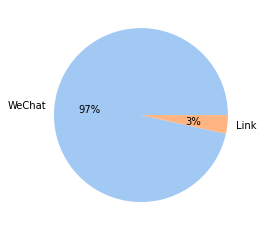

In [65]:
#define data
data = group_by_percentage(df_raw, '来源')['count_cnt']
labels = ['WeChat', 'Link']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# 3. Completing time

Most distribution of responding time range from three munites to 18 minutes, with few respondents take a long time to complete. That might because complete this survey in a discrete time period, with the system continuely count the time.

In [144]:
df_raw['Completing Time'] = df_raw['所用时间'].str.strip('秒').astype('int32')
df_raw['Completing Time'] = round(df_raw['Completing Time']/60, 2)
df_raw = df_raw.rename(columns={'2、Gender': 'Gender'})

Text(0.5, 0, 'Completing Time(minutes)')

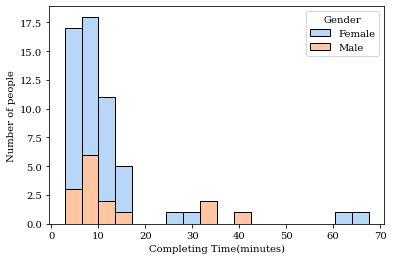

In [145]:
p_time = sns.histplot(data=df_raw, x="Completing Time", hue="Gender", multiple="stack", palette="pastel")
p_time.set_ylabel("Number of people", fontsize = 10)
p_time.set_xlabel("Completing Time(minutes)", fontsize = 10)

# 4. Education background and types of subject

1. Over 70 percent of respondents have a Mater degree and over 25 percent only obtained the bachelor degree, 
with 2 respondents belong to other educational background.

2. For the subjects reapondents are teaching, each respondent is allowed to choose 
multiple answers. The calculation method here is $$\frac{\text{Number of people choosing this subject}}{\text{Number of all chose answers}}$$. Therefore, the denominator is larger than the number of respondet numbers. The proportions of choosing 
Middle school or Senior High School, IELTS, and Toefl iBT are quite close, which are 22.69%, 21.85%, 21.85% respectively. The followings are PTE or Duolingo, and Primary school or below primary education, which both take up 13.45%. Besides, there are 8 answers for others: PET/KET, General English, Communication-based English oral task，SAT, GRE, Ap alevel Enlish related courses, and TOEIC

In [126]:
df_subject_explode = df_raw[['3、What is your level of education?', '4、What type of English classes do you teach?']]
df_subject_explode = df_subject_explode.rename(columns={'3、What is your level of education?':'Education', '4、What type of English classes do you teach?':'Teaching types'})
df_subject_explode['Teaching types'] = df_subject_explode['Teaching types'].str.split('┋')
df_subject_explode_2 = df_subject_explode.explode('Teaching types').reset_index(drop = True)
# drop answers for others
df_subject_explode_2.loc[df_subject_explode_2['Teaching types'].str.contains('Others')==True] = 'Others'

In [127]:
group_by_percentage(df_subject_explode_2, 'Teaching types')

,Teaching types,count_cnt,percentage
0,Middle school or Senior High School,27,22.69
1,IELTS,26,21.85
2,Toefl iBT,26,21.85
3,PTE or Duolingo,16,13.45
4,Primary school or below primary education,16,13.45
5,Others,8,6.72


In [128]:
group_by_percentage(df_subject_explode, 'Education')

,Education,count_cnt,percentage
0,Master,41,70.69
1,Bachelor,15,25.86
2,Others,2,3.45


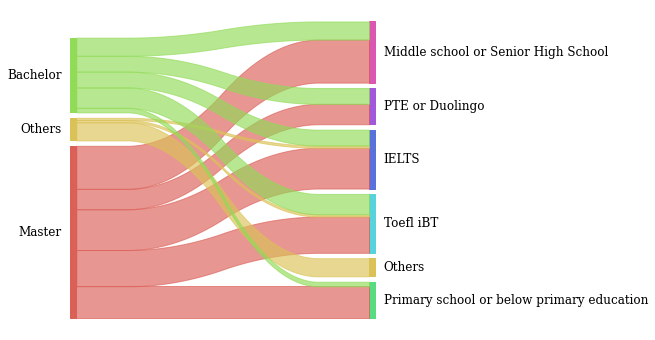

In [129]:
from pySankey.sankey import sankey
sankey(
    left=df_subject_explode_2["Education"], right=df_subject_explode_2["Teaching types"],
    aspect=20, fontsize=12
)

# 5. Teaching experience years

In [ ]:
sns.jointplot(x=df_raw['5、How long have you taught English?'], y=df_raw['7、How long have you taught English online ?'], cmap="Blues", shade=True, kind='kde')

In [152]:
df_raw.columns

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '1、I have read the Information Sheet and I am willing to participate in the survey.', 'Gender', '3、What is your level of education?', '4、What type of English classes do you teach?', '5、How long have you taught English?', '6、Do you have any experience in teaching English online?', '7、How long have you taught English online ?', '8、Please rank which factor that you think is the most effective for teaching English online (1 for the most effective, 2 for more effective ...)', '9、In terms of the English Proficiency, how do you feel about the effectiveness of factors for teaching English online?—Speaking English well', '9、Knowing English culture well', '9、Reading English well', '9、Having a high level of proficiency with English vocabulary', '9、Writing English well', '9、Pronouncing English well', '9、Understanding spoken English well', '9、Being familiar with English grammar',
       '10、In terms of the Pedagogical Knowledge, how do you feel a

In [177]:
group_by_percentage(df_raw, '5、How long have you taught English?')

,5、How long have you taught English?,count_cnt,percentage
0,Five to ten years,27,46.55
1,Three to five years,22,37.93
2,More than ten years,5,8.62
3,Less than two years,4,6.90


In [155]:
group_by_percentage(df_raw, '7、How long have you taught English online ?')

,7、How long have you taught English online ?,count_cnt,percentage
0,Two to three years,18,31.03
1,Three to five years,16,27.59
2,One year or less than one year,13,22.41
3,More than five years,11,18.97


Text(0.5, 0, 'How long have you taught English?')

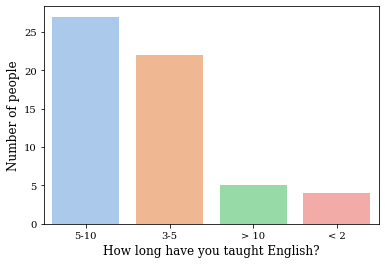

In [194]:
df_years_teaching = group_by_percentage(df_raw, '5、How long have you taught English?')
df_years_teaching = df_years_teaching.rename(columns={'5、How long have you taught English?': 'Teaching years', 'count_cnt': 'Number of respondent'})
df_years_teaching.loc[df_years_teaching['Teaching years'] == 'Less than two years', 'Teaching years'] = '< 2'
df_years_teaching.loc[df_years_teaching['Teaching years'] == 'Three to five years', 'Teaching years'] = '3-5'
df_years_teaching.loc[df_years_teaching['Teaching years'] == 'Five to ten years'  , 'Teaching years'] = '5-10'
df_years_teaching.loc[df_years_teaching['Teaching years'] == 'More than ten years', 'Teaching years'] = '> 10'
p_bar_years = sns.barplot(x="Teaching years", y="Number of respondent", data=df_years_teaching, palette="pastel")
p_bar_years.set_ylabel("Number of people", fontsize = 12)
p_bar_years.set_xlabel("How long have you taught English?", fontsize = 12)

(0.0, 20.0)

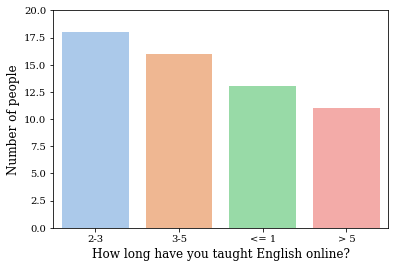

In [198]:
df_years_online_teaching = group_by_percentage(df_raw, '7、How long have you taught English online ?')
df_years_online_teaching = df_years_online_teaching.rename(columns={'7、How long have you taught English online ?': 'Online teaching years', 'count_cnt': 'Number of respondent'})
df_years_online_teaching.loc[df_years_online_teaching['Online teaching years'] == 'One year or less than one year', 'Online teaching years'] = '<= 1'
df_years_online_teaching.loc[df_years_online_teaching['Online teaching years'] == 'Two to three years', 'Online teaching years'] = '2-3'
df_years_online_teaching.loc[df_years_online_teaching['Online teaching years'] == 'Three to five years'  , 'Online teaching years'] = '3-5'
df_years_online_teaching.loc[df_years_online_teaching['Online teaching years'] == 'More than five years', 'Online teaching years'] = '> 5'
p_bar_oneline_years = sns.barplot(x="Online teaching years", y="Number of respondent", data=df_years_online_teaching, palette="pastel")
p_bar_oneline_years.set_ylabel("Number of people", fontsize = 12)
p_bar_oneline_years.set_xlabel("How long have you taught English online?", fontsize = 12)
plt.ylim(0, 20, 4)

,5、How long have you taught English?,7、How long have you taught English online ?,size
0,Five to ten years,More than five years,7
1,Five to ten years,One year or less than one year,4
2,Five to ten years,Three to five years,8
3,Five to ten years,Two to three years,8
4,Less than two years,One year or less than one year,4
5,More than ten years,More than five years,4
6,More than ten years,Two to three years,1
7,Three to five years,One year or less than one year,5
8,Three to five years,Three to five years,8
9,Three to five years,Two to three years,9
